# Machine Learning: Linear Regression

## Contents:
### 1. Importing Libraries & Data
### 2. Data Cleaning
### 3. Data Prep for Regression Analysis: Price vs. Living Space
### 4. Regression Analysis: Price vs. Living Space
### 5. Data Prep for Regression Analysis: Price vs. Median Household Income
### 6. Regression Analysis: Price vs. Median Household Income

## 1. Importing Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Ensuring that the graphs created are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Turning project folder into string path 
path = r'C:\Users\keirr\12-2023 U.S Housing Market Analysis'

In [4]:
# Importing dataset with path
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Housing_Data_Cleaned.pkl'))

## 2. Data Cleaning

In [5]:
df.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
5,10017,764900.0,1,1,643,145 E 48TH ST APT 11E,New York,New York,15514,20107.7,New York,188289.0,40.75235,-73.97260


In [6]:
df.columns

Index(['Zip Code', 'Price', 'Beds', 'Baths', 'Living Space', 'Address', 'City',
       'State', 'Zip Code Population', 'Zip Code Density', 'County',
       'Median Household Income', 'Latitude', 'Longitude'],
      dtype='object')

In [7]:
df.shape

(39017, 14)

### Missing Values

In [8]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    0
Latitude                   0
Longitude                  0
dtype: int64

### Duplicate Values

In [9]:
dups = df.duplicated()

In [10]:
dups.shape # No dups

(39017,)

### Looking into Extreme Values

C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


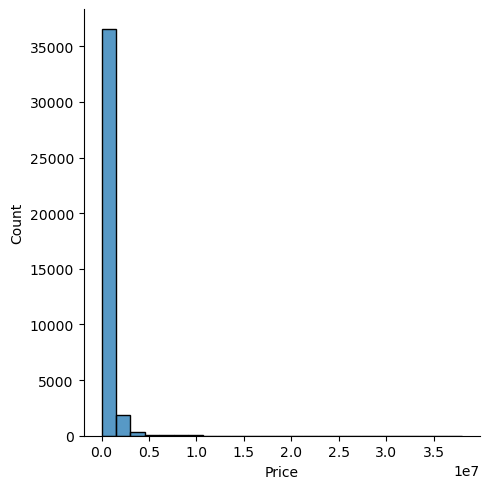

In [11]:
sns.displot(df['Price'], bins=25) # Showing extreme values

In [12]:
df['Price'].mean() # Check the mean

621767.8067757644

In [13]:
df['Price'].median() # Check the median

399900.0

In [14]:
df['Price'].max() # Check the max

38000000.0

## 3. Data Prep for Regression Analysis: Price vs. Living Space

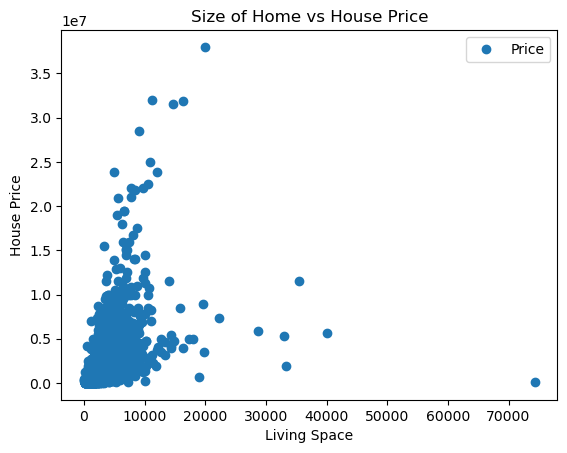

In [15]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Living Space', y='Price',style='o') # The style option will create a scatterplot
plt.title('Size of Home vs House Price')  
plt.xlabel('Living Space')  
plt.ylabel('House Price')  
plt.show()

In [16]:
# Reshaping the variables into NumPy arrays.

X = df['Living Space'].values.reshape(-1,1) # Put them into separate objects.
y = df['Price'].values.reshape(-1,1)

In [17]:
X

array([[1967],
       [ 718],
       [1538],
       ...,
       [1380],
       [ 856],
       [2840]], dtype=int64)

In [18]:
y

array([[3999000.],
       [1650000.],
       [ 760000.],
       ...,
       [ 950000.],
       [ 425000.],
       [1150000.]])

In [21]:
# Splitting data into a 'training' set and a 'test' set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression Analysis: Price vs. Living Space

In [22]:
regression = LinearRegression() # Creating a 'regression' object.

In [23]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

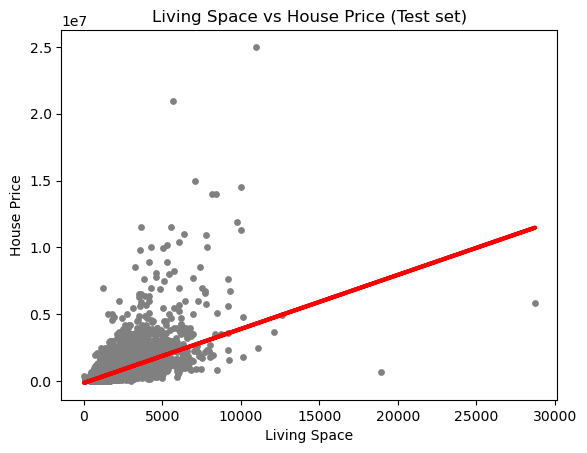

In [25]:
# Creating a plot that shows the regression line from the model on test set #1.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Living Space vs House Price (Test set)')
plot_test.xlabel('Living Space')
plot_test.ylabel('House Price')
plot_test.show()

In [26]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # Mean squared error
r2 = r2_score(y_test, y_predicted) # R2 score 

In [27]:
# Print the model summary statistics, to evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[404.32991221]]
Mean squared error:  498632528588.9847
R2 score:  0.29674926603399787


### Based off the test set #1, slope is a positive upward trend (which is good), however the RMSE is extremely high showing the points distance from the line is large, finally the R2 score is 0.29 (~0.3/30%). In conclusion a linear regression is not an accurate representation of the data.

In [28]:
y_predicted

array([[ 300936.26718451],
       [ 729121.64421954],
       [ 827373.81288764],
       ...,
       [1569319.20180103],
       [ 307001.21586772],
       [1974862.10375206]])

In [29]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,195000.0,3.009363e+05
1,599999.0,7.291216e+05
2,475000.0,8.273738e+05
3,375000.0,1.242441e+05
4,388020.0,5.119965e+05
5,445000.0,5.993317e+05
6,289000.0,7.178004e+05
7,189900.0,1.133272e+05
8,598000.0,1.601666e+06
9,319000.0,1.865109e+05


In [30]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train

In [31]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [32]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[404.32991221]]
Mean squared error:  734097046949.842
R2 score:  0.2614799071028724


### Slope: 404; positive upward slope
### RMSE: Huge number, points are far away from line
### R2: 0.26 (~0.30) is closer to 0 than 1, not the best model

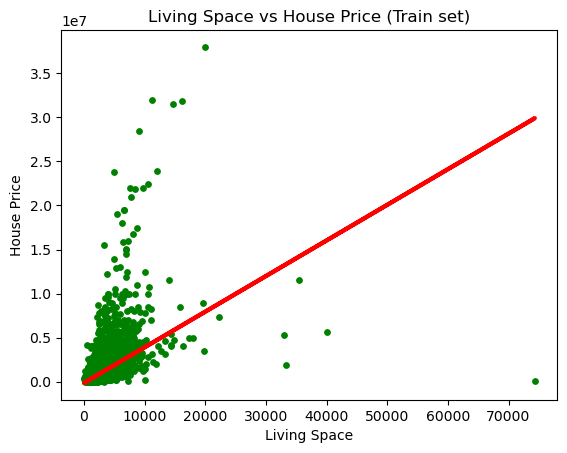

In [33]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Living Space vs House Price (Train set)')
plot_test.xlabel('Living Space')
plot_test.ylabel('House Price')
plot_test.show()

### Although there is a positive upward trend within the points, the clustering of the points proves that a linear regression is not the best representation of the data and variables.

## 5. Data Prep for Regression Analysis: Price vs. Median Household Income

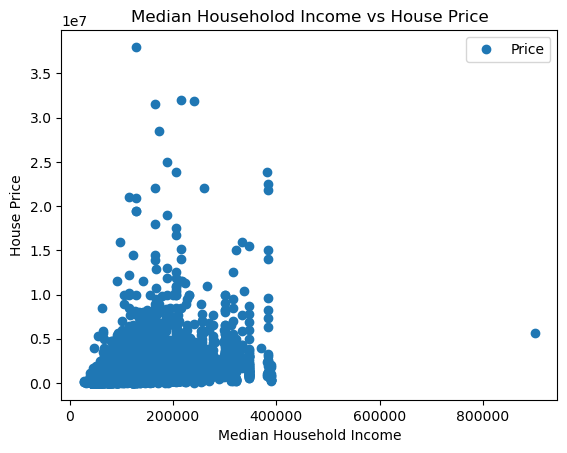

In [34]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Median Household Income', y='Price',style='o') # The style option will create a scatterplot
plt.title('Median Householod Income vs House Price')  
plt.xlabel('Median Household Income')  
plt.ylabel('House Price')  
plt.show()

In [35]:
# Reshaping the variables into NumPy arrays.

X2 = df['Median Household Income'].values.reshape(-1,1) # Again putting them into separate objects.
y2 = df['Price'].values.reshape(-1,1)

In [36]:
X2 # specifying 2 for set #2

array([[370046.],
       [249880.],
       [249880.],
       ...,
       [205611.],
       [205611.],
       [205611.]])

In [37]:
y2 # specifying 2 for set #2

array([[3999000.],
       [1650000.],
       [ 760000.],
       ...,
       [ 950000.],
       [ 425000.],
       [1150000.]])

In [38]:
# Splitting data into a 'training' set and a 'test' set.

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

## 6. Regression Analysis: Price vs. Median Household Income

In [39]:
regression2 = LinearRegression() # Creating a 'regression2' object.

In [40]:
# Fit regression2 object onto the training set.
regression2.fit(X2_train, y2_train)

LinearRegression()

In [41]:
# Predicting the values of y2 using X2.

y2_predicted = regression2.predict(X2_test)

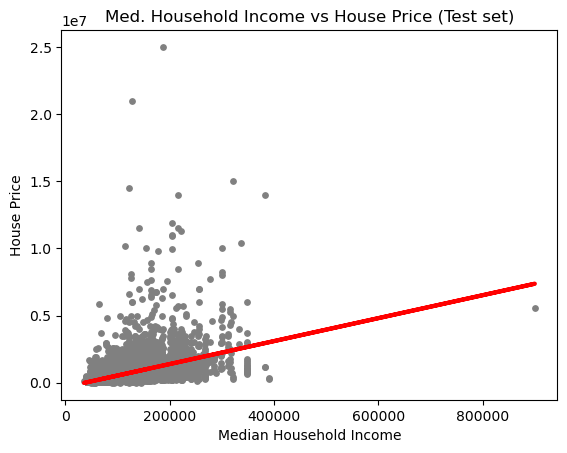

In [42]:
# Creating a plot that shows the regression line from the model on test set #2.

plot_test = plt
plot_test.scatter(X2_test, y2_test, color='gray', s = 15)
plot_test.plot(X2_test, y2_predicted, color='red', linewidth =3)
plot_test.title('Med. Household Income vs House Price (Test set)')
plot_test.xlabel('Median Household Income')
plot_test.ylabel('House Price')
plot_test.show()

### Positive upward slope, but I want to take a look into summary stats 

In [43]:
# Creating objects that contain the model summary statistics.

rmse2 = mean_squared_error(y2_test, y2_predicted) # Mean squared error
r22 = r2_score(y2_test, y2_predicted) # R2 score 

In [44]:
# Print the model summary statistics, to evaluate the performance of the model.

print('Slope:' ,regression2.coef_)
print('Mean squared error: ', rmse2)
print('R2 score: ', r22)

Slope: [[8.54641009]]
Mean squared error:  564589540938.0852
R2 score:  0.20372621862879436


### Based off the test set #2, slope is a positive upward trend (which is good), however the RMSE is extremely high, yet again, showing the points distance from the line is immense, finally the R2 score is 0.20 (20%). In conclusion a linear regression is not an accurate representation of the data or variables

In [45]:
y2_predicted

array([[ 296325.39624124],
       [ 460869.42975388],
       [ 635002.5353904 ],
       ...,
       [ 589339.06626569],
       [ 426359.0258    ],
       [1009258.37975502]])

In [46]:
# Create another dataframe comparing the actual and predicted values of y.

data2 = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_predicted.flatten()})
data2.head(30)

,Actual,Predicted
0,195000.0,2.963254e+05
1,599999.0,4.608694e+05
2,475000.0,6.350025e+05
3,375000.0,9.657486e+05
4,388020.0,3.437238e+05
5,445000.0,6.270971e+05
6,289000.0,6.811019e+05
7,189900.0,3.162471e+05
8,598000.0,4.812526e+05
9,319000.0,1.025975e+06


In [47]:
# Predict.

y2_predicted_train = regression2.predict(X2_train) # This is predicting X2_train of set #2

In [48]:
rmse2 = mean_squared_error(y2_train, y2_predicted_train)
r22 = r2_score(y2_train, y2_predicted_train)

In [49]:
print('Slope:' ,regression2.coef_)
print('Mean squared error: ', rmse2)
print('R2 score: ', r22)

Slope: [[8.54641009]]
Mean squared error:  830383954710.1228
R2 score:  0.16461285613275956


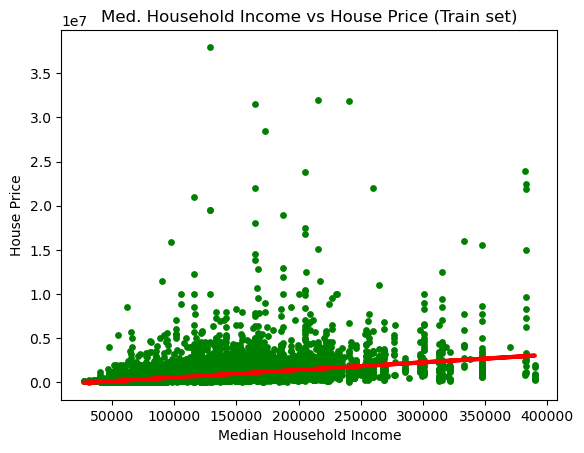

In [50]:
# Visualizing the training set #2 results.

plot_test = plt
plot_test.scatter(X2_train, y2_train, color='green', s = 15)
plot_test.plot(X2_train, y2_predicted_train, color='red', linewidth =3)
plot_test.title('Med. Household Income vs House Price (Train set)')
plot_test.xlabel('Median Household Income')
plot_test.ylabel('House Price')
plot_test.show()

### Although there is a slightly positive upward trend within the points, the clustering of the points, as well as the categorical nature of the "Median Household Income' column, proves that a linear regression is not the best representation of the data and variables.